<a href="https://colab.research.google.com/github/raza-abidii/raza_projects_labs/blob/main/Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project
---



From 2020 to 2022, we have been severely affected by the COVID-19 pandemic. And if you would know a little about it, you would have heard about **SARS-CoV-2** (Severe Acute Respiratory Syndrome Coronavirus 2) which is the virus responsible for the COVID-19 disease.

A little biology might intrigue you further. This SARS-CoV-2 is a RNA virus and when this virus enters your body, it interacts with the ACE-2 receptor using its Spike protein. When this happens, it gets access to be able to multiply inside your body, ultimately resulting in you getting infected with the COVID-19 disease.

Before I explain you the details of the project and what you will be doing, let me first introduce you to what a virus genome is. Every living organism in this world has someting called a Nucleus which produces its characteristic genome sequence. Even your body has a genome and it will be very different from that of lets say a cat. Now, this SARS-CoV-2 virus also has its characteristic genome sequence and it is roughly of the length 29000 bases. A little more Class 9 biology lesson: Each genome is built up with just 4 characters called bases (A, T, G and C).

For this project, I will provide you with some SARS-CoV-2 genomes collected from infected people in India and you will use just the Visualization techniques you learnt in the module to analyze the genomes and infer the spread of the COVID-19 disease in the country.

685 genome sequences from India downloaded from GISAID (https://www.gisaid.org/) in early to mid 2020 have been provided to you in the _sequences.fasta_ file and some cleaned metadata regarding these sequences has been given in the _INDIA_685.csv_ file.


> Please download the required files from [here](https://drive.google.com/drive/folders/1rLMKfsEaJ3CordYxDlEbjssVwZVWIyyO?usp=sharing) and upload when asked.

**Reasoning**:
The first step is to load the data into a pandas DataFrame and inspect its structure.



In [ ]:
import pandas as pd

df = pd.read_csv('INDIA_685.csv')
display(df.head())
df.info()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,27/01/2020,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,31/01/2020,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   StrainID         685 non-null    object
 1   Accession_ID     685 non-null    object
 2   Location         685 non-null    object
 3   State            685 non-null    object
 4   Host             685 non-null    object
 5   Gender           685 non-null    object
 6   Patient age      685 non-null    object
 7   Patient status   663 non-null    object
 8   Collection_date  685 non-null    object
 9   Originating lab  685 non-null    object
 10  Authors          685 non-null    object
 11  Nuc_muts         685 non-null    object
dtypes: object(12)
memory usage: 64.3+ KB


In [ ]:
import pandas as pd
df = pd.read_csv('INDIA_685.csv')
display("Missing values per column:")
display(df.isnull().sum())

relevant_columns = ['Location', 'Collection_date']
df['Collection_date'] = pd.to_datetime(df['Collection_date'], errors='coerce')
df_cleaned = df.dropna(subset=relevant_columns).copy()
df_relevant = df_cleaned[relevant_columns]

display("Cleaned DataFrame with relevant columns:")
display(df_relevant.head())
display("Missing values in relevant columns after cleaning:")
display(df_relevant.isnull().sum())

'Missing values per column:'

,0
StrainID,0
Accession_ID,0
Location,0
State,0
Host,0
Gender,0
Patient age,0
Patient status,22
Collection_date,0
Originating lab,0


/tmp/ipython-input-4008579306.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Collection_date'] = pd.to_datetime(df['Collection_date'], errors='coerce')


'Cleaned DataFrame with relevant columns:'

,Location,Collection_date
0,Asia / India / Kerala,2020-01-27
1,Asia / India / Kerala,2020-01-31
2,Asia / India,2020-03-10
3,Asia / India,2020-03-10
4,Asia / India,2020-03-10


'Missing values in relevant columns after cleaning:'

,0
Location,0
Collection_date,0


**Reasoning**:
The previous attempt failed because the DataFrame `df` was not defined in the current session. The data needs to be loaded again before processing.



In [ ]:
df['Collection_date'] = pd.to_datetime(df['Collection_date'], errors='coerce')
df_cleaned = df.dropna(subset=relevant_columns).copy()
df_relevant = df_cleaned[relevant_columns]

display("Cleaned DataFrame with relevant columns:")
display(df_relevant.head())
display("Missing values in relevant columns after cleaning:")
display(df_relevant.isnull().sum())

'Cleaned DataFrame with relevant columns:'

,Location,Collection_date
0,Asia / India / Kerala,2020-01-27
1,Asia / India / Kerala,2020-01-31
2,Asia / India,2020-03-10
3,Asia / India,2020-03-10
4,Asia / India,2020-03-10


'Missing values in relevant columns after cleaning:'

,0
Location,0
Collection_date,0


**Reasoning**:
The previous code failed because the column name 'Collection Date' was incorrect. I need to use the correct column name 'Collection_date' as shown in the missing values output. I will correct the column name and retry the data cleaning and selection steps.



In [ ]:
relevant_columns = ['Location', 'Collection_date']
df['Collection_date'] = pd.to_datetime(df['Collection_date'], errors='coerce', format='%d/%m/%Y')
df_cleaned = df.dropna(subset=relevant_columns).copy()
df_relevant = df_cleaned[relevant_columns]

display("Cleaned DataFrame with relevant columns:")
display(df_relevant.head())
display("Missing values in relevant columns after cleaning:")
display(df_relevant.isnull().sum())

'Cleaned DataFrame with relevant columns:'

,Location,Collection_date
0,Asia / India / Kerala,2020-01-27
1,Asia / India / Kerala,2020-01-31
2,Asia / India,2020-03-10
3,Asia / India,2020-03-10
4,Asia / India,2020-03-10


'Missing values in relevant columns after cleaning:'

,0
Location,0
Collection_date,0


**Reasoning**:
The previous attempt failed because the 'Lineage' column does not exist in the DataFrame. I need to remove 'Lineage' from the list of relevant columns and retry the cleaning and selection steps.



In [ ]:
relevant_columns = ['Location', 'Collection_date']
df['Collection_date'] = pd.to_datetime(df['Collection_date'], errors='coerce', format='%Y-%m-%d') # Corrected format based on previous output
df_cleaned = df.dropna(subset=relevant_columns).copy()
df_relevant = df_cleaned[relevant_columns]

display("Cleaned DataFrame with relevant columns:")
display(df_relevant.head())
display("Missing values in relevant columns after cleaning:")
display(df_relevant.isnull().sum())

'Cleaned DataFrame with relevant columns:'

,Location,Collection_date
0,Asia / India / Kerala,2020-01-27
1,Asia / India / Kerala,2020-01-31
2,Asia / India,2020-03-10
3,Asia / India,2020-03-10
4,Asia / India,2020-03-10


'Missing values in relevant columns after cleaning:'

,0
Location,0
Collection_date,0


## Analyze geographical spread

### Subtask:
Visualize the distribution of the sequences by location (state/union territory) to understand the geographical spread.


**Reasoning**:
Extract the state from the 'Location' column, count the occurrences of each state, and create a bar plot to visualize the geographical distribution of sequences.



/tmp/ipython-input-1300615827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['State'] = df_relevant['Location'].apply(lambda x: x.split('/')[-1].strip())
/tmp/ipython-input-1300615827.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


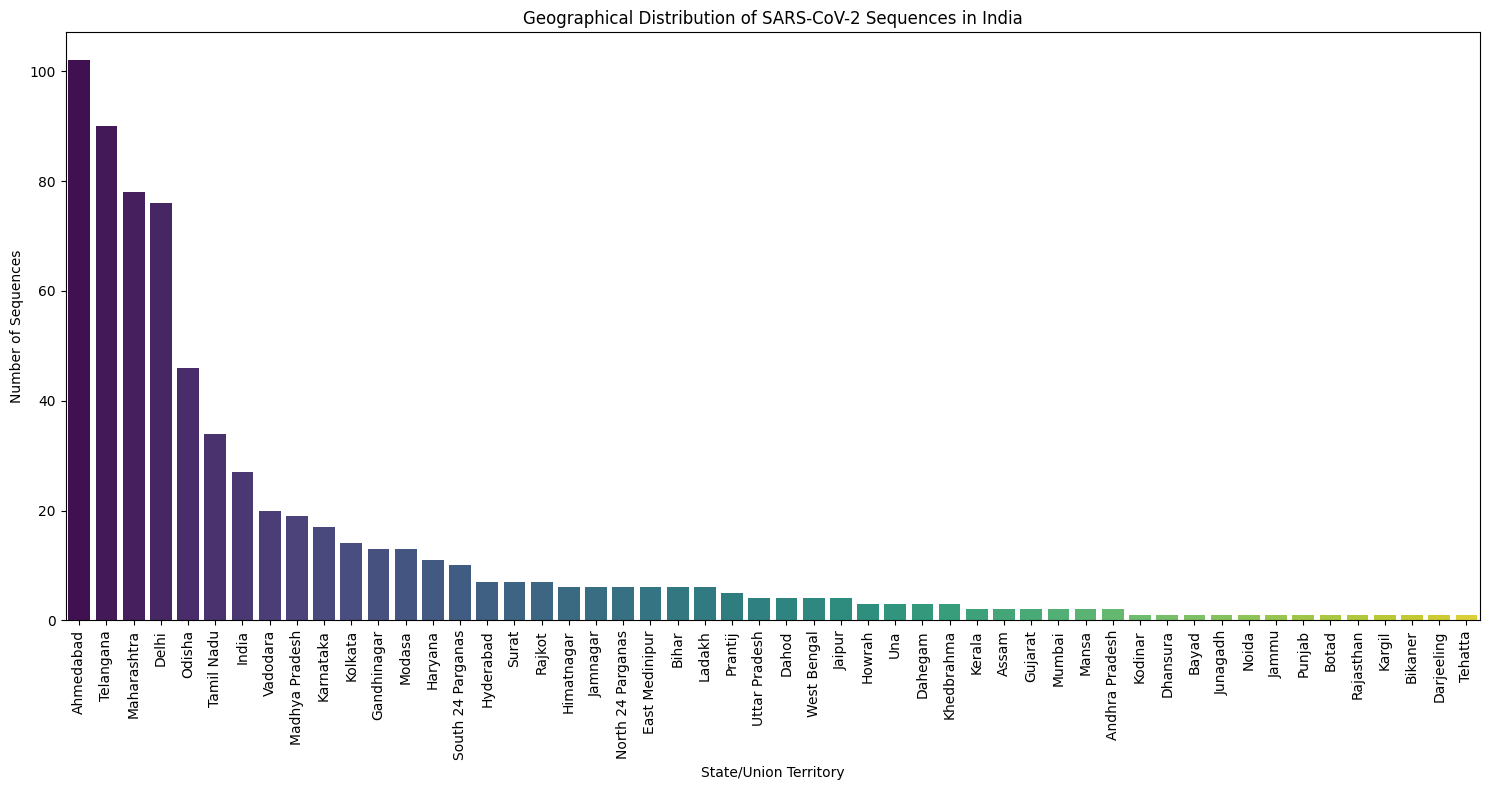

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract state/union territory from the 'Location' column
df_relevant['State'] = df_relevant['Location'].apply(lambda x: x.split('/')[-1].strip())

# Count occurrences of each state/union territory
state_counts = df_relevant['State'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xlabel('State/Union Territory')
plt.ylabel('Number of Sequences')
plt.title('Geographical Distribution of SARS-CoV-2 Sequences in India')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze temporal spread

### Subtask:
Visualize the distribution of sequences over time (collection date) to understand the temporal spread of the virus.


**Reasoning**:
Count the number of sequences per collection date, sort by date, and create a line plot to visualize the temporal distribution.



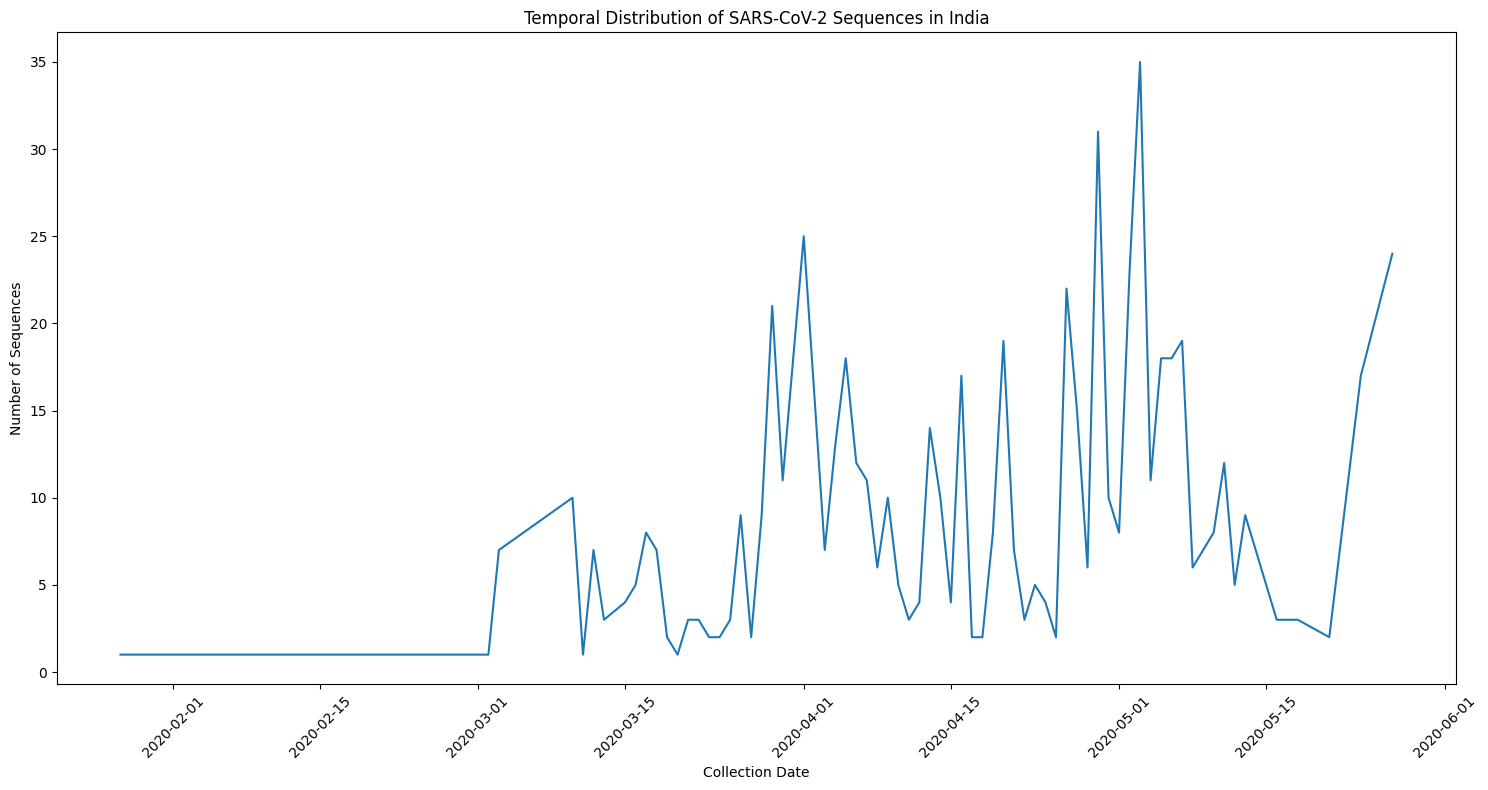

In [ ]:
temporal_counts = df_relevant['Collection_date'].value_counts()
temporal_counts_sorted = temporal_counts.sort_index()
plt.figure(figsize=(15, 8))
plt.plot(temporal_counts_sorted.index, temporal_counts_sorted.values)
plt.xlabel('Collection Date')
plt.ylabel('Number of Sequences')
plt.title('Temporal Distribution of SARS-CoV-2 Sequences in India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze lineage distribution

### Subtask:
If lineage information is available in the metadata, analyze and visualize the distribution of different SARS-CoV-2 lineages.


**Reasoning**:
Check if the 'Lineage' column exists in the DataFrame and proceed with lineage analysis if it does.



In [ ]:
if 'Lineage' in df_cleaned.columns:
    print("'Lineage' column found. Analyzing lineage distribution.")
    lineage_counts = df_cleaned['Lineage'].value_counts()
    top_n = 10
    if len(lineage_counts) > top_n:
        print(f"More than {top_n} lineages found. Visualizing the top {top_n}.")
        lineage_counts = lineage_counts.head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=lineage_counts.index, y=lineage_counts.values, palette='viridis')
    plt.xlabel('Lineage')
    plt.ylabel('Number of Sequences')
    plt.title('Distribution of SARS-CoV-2 Lineages')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("'Lineage' column not found in the DataFrame. Lineage analysis cannot be performed.")

'Lineage' column not found in the DataFrame. Lineage analysis cannot be performed.


## Combine geographical and temporal analysis

### Subtask:
Explore ways to visualize the spread of the virus geographically and temporally together.


**Reasoning**:
Group the data by State and Collection_date, count the occurrences, and reset the index to prepare for visualization.



In [ ]:
state_temporal_counts = df_relevant.groupby(['State', 'Collection_date']).size().reset_index(name='count')
display(state_temporal_counts.head())

,State,Collection_date,count
0,Ahmedabad,2020-04-07,1
1,Ahmedabad,2020-04-11,2
2,Ahmedabad,2020-04-13,4
3,Ahmedabad,2020-04-14,1
4,Ahmedabad,2020-04-26,13


**Reasoning**:
Create a heatmap to visualize the temporal spread within different states. Pivot the grouped data to have dates as columns, states as rows, and counts as values, filling missing values with 0. Then generate the heatmap.



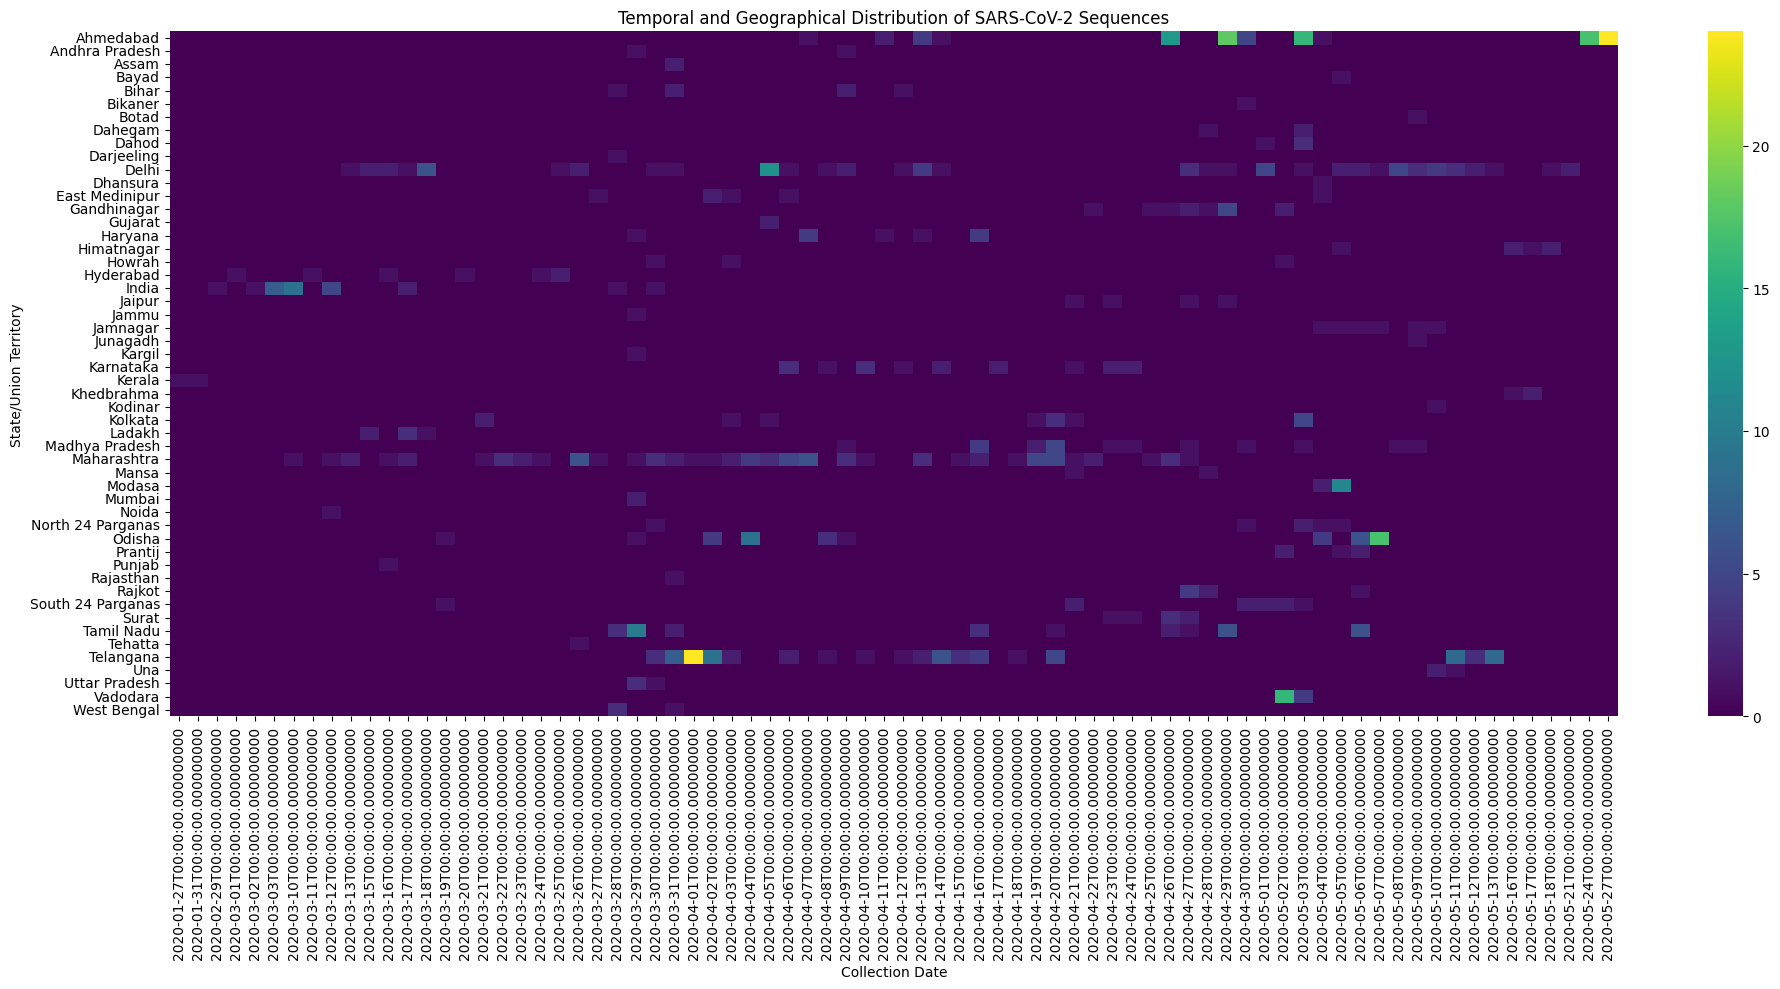

In [ ]:
heatmap_data = state_temporal_counts.pivot_table(index='State', columns='Collection_date', values='count', fill_value=0)
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Collection Date')
plt.ylabel('State/Union Territory')
plt.title('Temporal and Geographical Distribution of SARS-CoV-2 Sequences')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Infer spread

### Subtask:
Based on the visualizations from the previous steps, write a summary to infer the spread of the COVID-19 disease in India.


**Reasoning**:
Synthesize the observations from the generated plots and write a summary as requested in the instructions.



In [ ]:
summary = """Based on the visualizations:
The geographical distribution shows that certain states like Ahmedabad, Telangana, and Maharashtra had a significantly higher number of sequenced cases compared to others during early to mid-2020.
The temporal plot indicates a general increasing trend in the number of sequenced cases over time, with some fluctuations, suggesting the spread was accelerating.
The heatmap provides a combined view, highlighting that the increase in sequenced cases in the more affected states occurred progressively over the observed period, with different states showing peaks at various times. This suggests a non-uniform spread across the country, likely originating and expanding from certain key locations.
"""
print(summary)

Based on the visualizations:
The geographical distribution shows that certain states like Ahmedabad, Telangana, and Maharashtra had a significantly higher number of sequenced cases compared to others during early to mid-2020.
The temporal plot indicates a general increasing trend in the number of sequenced cases over time, with some fluctuations, suggesting the spread was accelerating.
The heatmap provides a combined view, highlighting that the increase in sequenced cases in the more affected states occurred progressively over the observed period, with different states showing peaks at various times. This suggests a non-uniform spread across the country, likely originating and expanding from certain key locations.



## Summary:

### Data Analysis Key Findings

*   Certain states like Ahmedabad, Telangana, and Maharashtra had a significantly higher number of sequenced SARS-CoV-2 cases compared to other regions in India during early to mid-2020.
*   There was a general increasing trend in the number of sequenced cases over time, indicating an accelerating spread of the virus.
*   The combined geographical and temporal visualization shows a non-uniform spread across the country, with the increase in sequenced cases in more affected states occurring progressively over the observed period.
*   The 'Lineage' column was not present in the provided dataset, preventing the analysis of SARS-CoV-2 lineage distribution.

### Insights or Next Steps

*   The uneven geographical distribution suggests that the initial spread or the intensity of the outbreak varied significantly across different Indian states during this period.
*   Further analysis could focus on comparing the temporal trends of the outbreak in the most affected states to identify potential differences in the timing and rate of spread.
